### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
read_path = 'D:/IP Project/images/'
write_path = 'D:/IP Project/dataset/training_set/'
write_path_test = 'D:/IP Project/dataset/test_set/'

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
d = {'rbc': 0, 'wbc': 0}
for i in range(len(X_train)):
	features = X_train[i]
	label = y_train[i]
	image = cv2.imread(read_path + features[0])
	cell = image[int(features[2]): int(features[4]), int(features[1]): int(features[3])]
	d[label] += 1
	cv2.imwrite(write_path + label + '/' + label + '.' + str(d[label]) + '.png', cell)

In [5]:
d = {'rbc': 0, 'wbc': 0}
for i in range(len(X_test)):
	features = X_test[i]
	label = y_test[i]
	image = cv2.imread(read_path + features[0])
	cell = image[int(features[2]): int(features[4]), int(features[1]): int(features[3])]
	d[label] += 1
	cv2.imwrite(write_path_test + label + '/' + label + '.' + str(d[label]) + '.png', cell)

In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 1872 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 468 images belonging to 2 classes.


In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model = cnn.fit(x=training_set, validation_data=test_set, epochs=5)

Epoch 1/5
59/59 [==============================] - 7s 104ms/step - loss: 0.1595 - accuracy: 0.9567 - val_loss: 0.0315 - val_accuracy: 0.9957
Epoch 2/5
59/59 [==============================] - 6s 104ms/step - loss: 0.0472 - accuracy: 0.9872 - val_loss: 0.0138 - val_accuracy: 0.9957
Epoch 3/5
59/59 [==============================] - 6s 103ms/step - loss: 0.0251 - accuracy: 0.9931 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/5
59/59 [==============================] - 7s 110ms/step - loss: 0.0171 - accuracy: 0.9979 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/5
59/59 [==============================] - 8s 130ms/step - loss: 0.0192 - accuracy: 0.9979 - val_loss: 0.0019 - val_accuracy: 1.0000


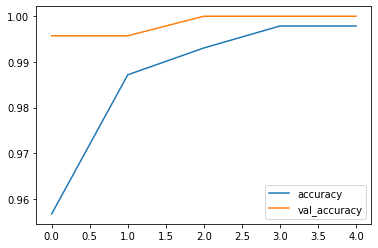

In [11]:
plt.plot(model.history['accuracy'], label='accuracy')
plt.plot(model.history['val_accuracy'], label='val_accuracy')
plt.legend()

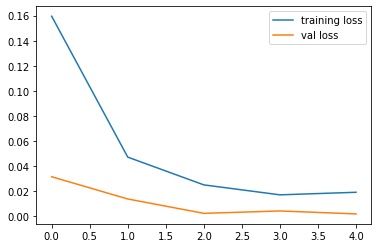

In [14]:
plt.plot(model.history['loss'], label='training loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()

In [12]:
from keras.preprocessing import image
test_image = image.load_img('dataset/test_set/rbc/rbc.117.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(training_set.class_indices)
if result[0][0] == 1:
  prediction = 'wbc'
else:
  prediction = 'rbc'

{'rbc': 0, 'wbc': 1}


In [13]:
print(prediction)

rbc
